<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


#### Add your code below following the instructions given in the course


In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from math import sqrt
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import norm, ttest_ind
from scipy.stats import pearsonr

In [8]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Task 4.1 Box plot

Text(0.5, 0, 'Median value of owner-occupied homes in $1000s')

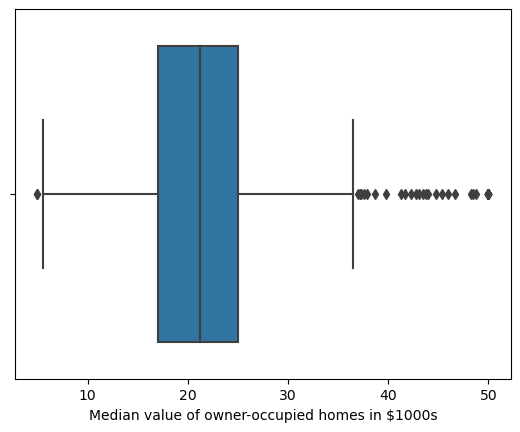

In [9]:
sns.boxplot(boston_df['MEDV'])
plt.xlabel('Median value of owner-occupied homes in $1000s')

In [10]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [11]:
chas_eval = boston_df.groupby('CHAS')[["Unnamed: 0"]].count().reset_index()

In [12]:
chas_eval.head()

,CHAS,Unnamed: 0
0,0.0,471
1,1.0,35


## Task 4.2 Bar Plot

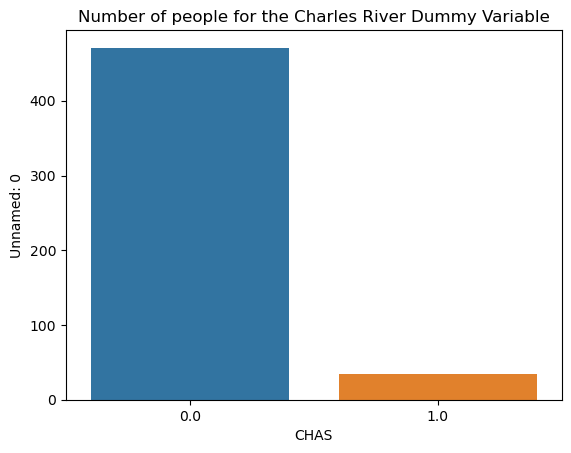

In [13]:
ax = sns.barplot(x='CHAS', y='Unnamed: 0', data=chas_eval).set(title='Number of people for the Charles River Dummy Variable')

In [14]:
bins = [0,35,70,150]
labels = ['<=35','>35 but <70','=>70']
age_group = pd.cut(boston_df['AGE'], bins=bins,labels=labels)
print (age_group)

0      >35 but <70
1             =>70
2      >35 but <70
3      >35 but <70
4      >35 but <70
          ...     
501    >35 but <70
502           =>70
503           =>70
504           =>70
505           =>70
Name: AGE, Length: 506, dtype: category
Categories (3, object): ['<=35' < '>35 but <70' < '=>70']


In [15]:
boston_df.insert(8,'Age Group',age_group)

In [16]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,Age Group,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,>35 but <70,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,=>70,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,>35 but <70,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,>35 but <70,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,>35 but <70,6.0622,3.0,222.0,18.7,5.33,36.2


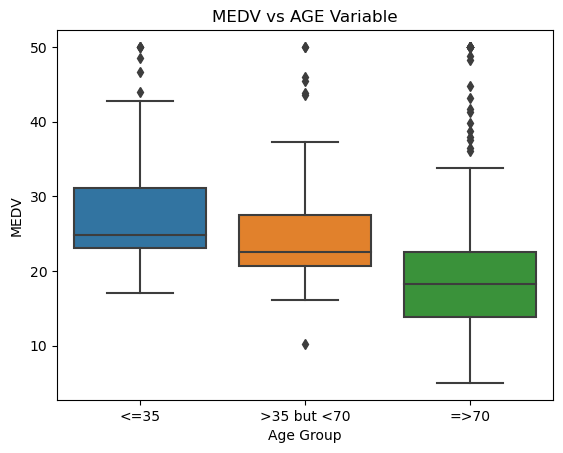

In [17]:
#task 4.3 Box Plot
bx = sns.boxplot(x='Age Group', y='MEDV', data=boston_df).set(title='MEDV vs AGE Variable')

## Task 4.4 Scatter Plot

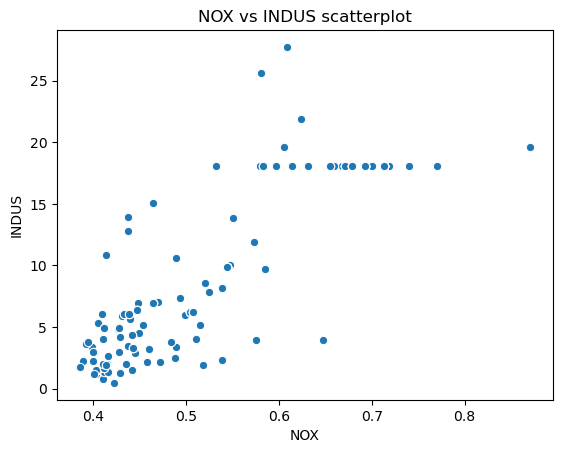

In [18]:
cx = sns.scatterplot(x='NOX', y='INDUS',data=boston_df).set(title='NOX vs INDUS scatterplot')

#### As shown in the scatterplot, there is lower nitrix oxide concentrations when there is a lower proportion of non retail business land in a town.

## Task 4.5 Histogram

Text(0, 0.5, 'Frequency')

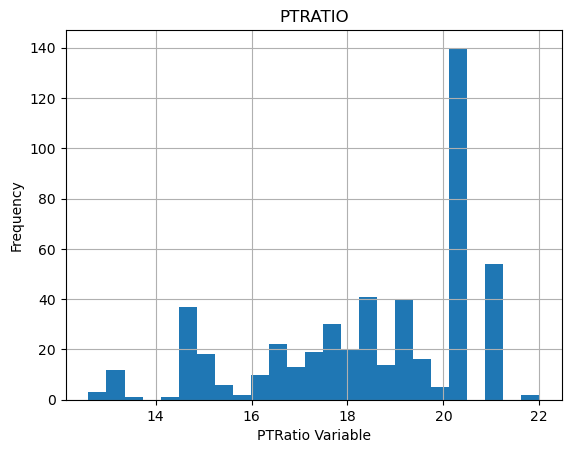

In [19]:
dx = boston_df.hist(column='PTRATIO',bins=25, grid=True)
plt.xlabel('PTRatio Variable')
plt.ylabel('Frequency')

## Task 5.1 T-test

#### Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river.
#### Alternative Hypothesis: There is a significant difference in the median value of houses bounded by the Charles river.

In [20]:
group_1 = boston_df[boston_df['CHAS'] == 0]["MEDV"]
group_2 = boston_df[boston_df['CHAS'] == 1]["MEDV"]

In [25]:
ttest_result= ttest_ind(group_1, group_2)

In [26]:
ttest_result

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

#### Since the p-value is less than the alpha, we reject the null hypothesis meaning that there is a significant difference in the median values

## Task 5.2 ANOVA

#### Null Hypothesis: There is no significant difference in median value of houses for each proportion of owner occupied units prior to 1940.
#### Alternative Hypothesis: There is a significant difference in median value of houses for each proportion of owner occupied units prior to age 1940.

In [27]:
below_35 = boston_df[boston_df['Age Group'] == '<=35']['MEDV']
between_3570 = boston_df[boston_df['Age Group'] == '>35 but <70']['MEDV']
above_70 = boston_df[boston_df['Age Group'] == '=>70']['MEDV']

In [28]:
anova= f_oneway(below_35, between_3570, above_70)

In [29]:
anova

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

#### Since the p-value is less than the alpha, we can conclude that there is a significant difference

## Task 5.3 Pearson Correlation

#### Null Hypothesis: There is no significant correlation between NOX and INDUS
#### Alternative Hypothesis: There is a significant correlation between NOX and INDUS

In [42]:
pearson = pearsonr(boston_df["NOX"],boston_df["INDUS"])

In [43]:
pearson

(0.7636514469209149, 7.913361061240043e-98)

#### No we cannot conclude that there is no relationship but we can conclude that there is a strong positive relationship between NOX and INDUS. Furthermore, since the p-value is lower, the the relationship is statistically significant.

## Task 5.4 Regression Analysis

In [47]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
prediction = model.predict(x)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.21e-08
Time:                        15:23:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
rsq = model.rsquared
np.sqrt(rsq)

0.24992873408590413

#### Since the r-squared value is low, the relationship is weak and there is little of impact of DIS to MEDV